In [81]:
load('interval_signals.py')

In [82]:
from flowstar.reachability import Poly, Reach, set_precision

In [83]:
set_precision(53)

In [84]:
varsd = [b't', b'x', b'y']
qt = Poly(1, 't', 0, varsd)
qx = Poly(-1, 'y', 1, varsd)
qy = Poly(1, 'x', 1, varsd)
print "t' = {}\nx' = {}\ny' = {}".format(qt, qx, qy)

D = Reach(
    varsd,
    [qt, qx, qy],
    [(0,0), (4,5), (1,2)],
    10,
    0.75,
    order=10,
    precondition=1,
    estimation=1e-1,
    cutoff_threshold=1e-20,
)

t' = (([1.0000000000e+00 , 1.0000000000e+00]))
x' = (([-1.0000000000e+00 , -1.0000000000e+00] * y))
y' = (([1.0000000000e+00 , 1.0000000000e+00] * x))


In [85]:
D.res

2

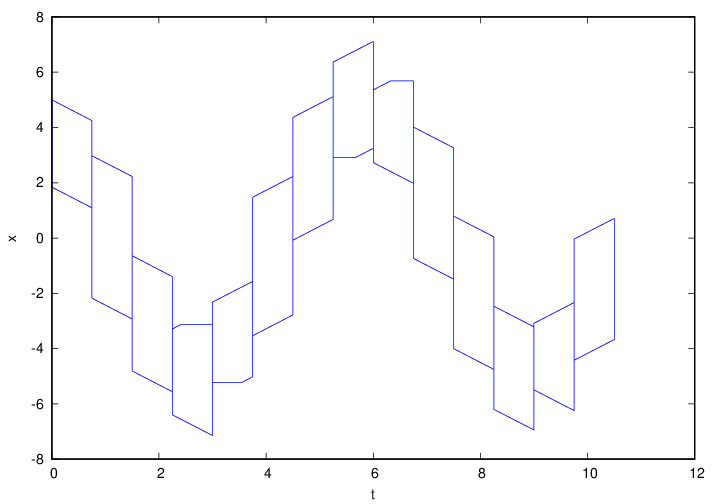

In [86]:
D.wplot('t', 'x')

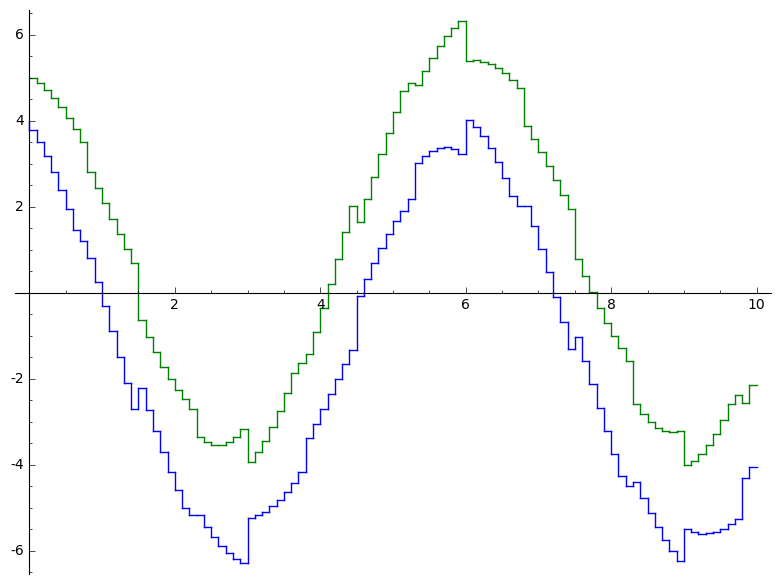

In [87]:
D.sage_plot('x', 0.1)

In [88]:
def f(v, x):
    x = RIF(x)
    res = D(x)
    return RIF(res[varsd.index(v)])

In [89]:
from functools import partial

In [90]:
f('t', RIF(1,1.1)).str(style='brackets')

'[1.0000000000000000 .. 1.1000000000000001]'

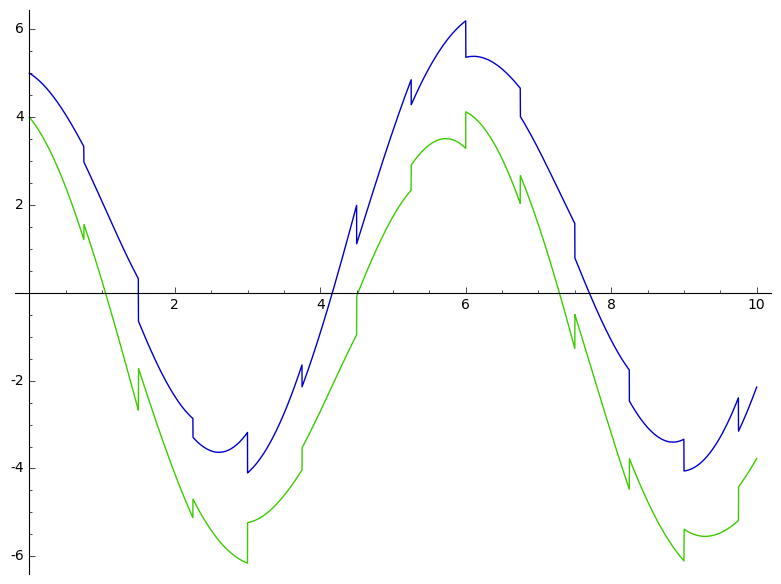

In [91]:
p1 = plot([(lambda t: f('x', t).upper()),
          (lambda t: f('x', t).lower())], (0, 10))
p1

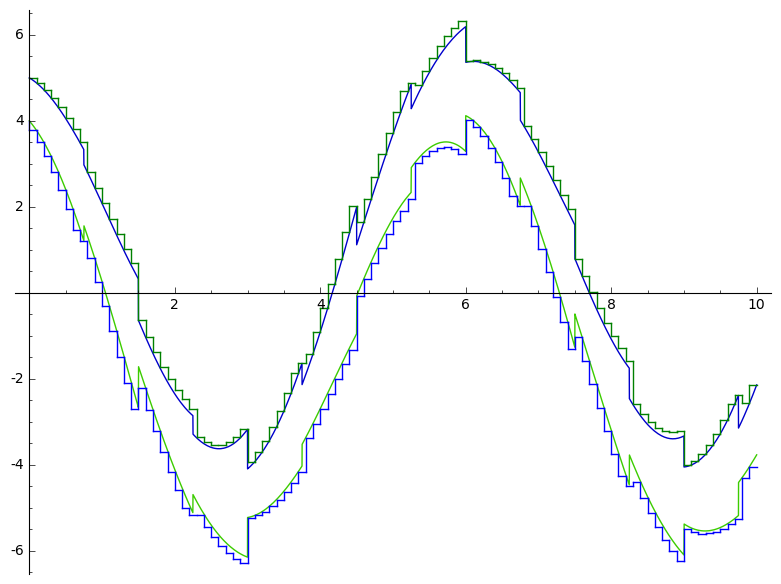

In [92]:
p1 + D.sage_plot('x')

In [93]:
p2 = plot([(lambda t: -f('y', t).upper()),
          (lambda t: -f('y', t).lower())], (0, 10))

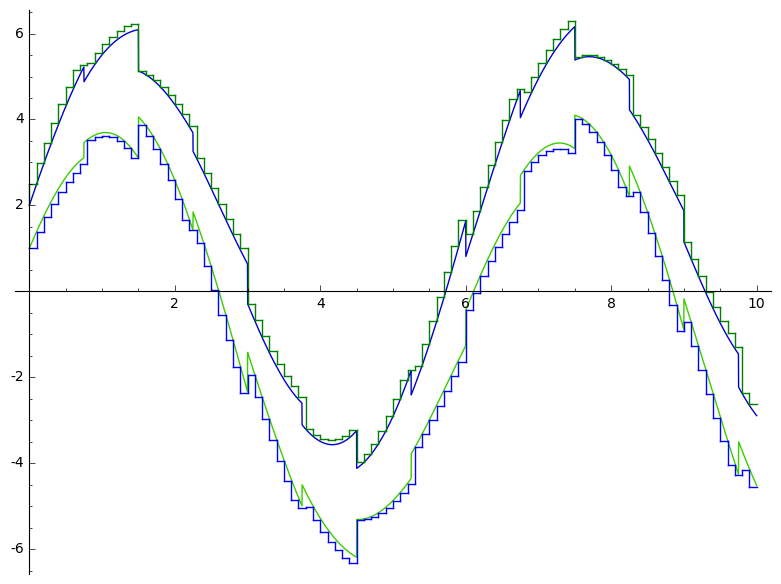

In [94]:
plot([(lambda t: f('y', t).upper()),
      (lambda t: f('y', t).lower())], (0, 10)) \
 + D.sage_plot('y')

In [95]:
sig = to_signal((lambda t: f('x', t)),
                (lambda t: -f('y', t)),
                RIF(0, 0.1))

t = [0.00000000000000000 .. 0.10000000000000001]
b = -1.?e1
stopping since presumed converged
t = [0.00000000000000000 .. 0.10000000000000001], fprime(t) = [-2.5000004150952080 .. -0.99999955976484611]


In [96]:
sig = to_signal_bisection((lambda t: f('x', t)), RIF(0, 10), 0.1)

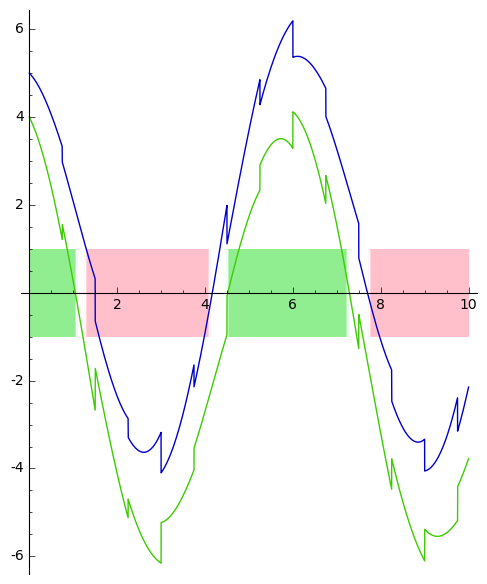

In [97]:
sig.plot() + p1

In [98]:
load('interval_root_isolation.py')

In [99]:
roots = list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(0,2)))
roots

t = [0.00000000000000000 .. 2.0000000000000000]
b = -1.?e1
t = [0.56304896245478697 .. 2.0000000000000000]
b = -1.?e1
t = [0.86240554228471000 .. 2.0000000000000000]
b = -1.?e1
t = [1.0058343699573994 .. 1.8685693613259733]
b = -1.?e1
t = [1.0397641927720466 .. 1.6758308996350080]
b = -1.?e1
t = [1.0459071239503614 .. 1.6684622101030567]
b = -1.?e1
t = [1.0469431800239814 .. 1.6671303434872456]
b = -1.?e1
t = [1.0471156262581939 .. 1.6669058731543341]
b = -1.?e1
t = [1.0471442648315125 .. 1.6668685161643849]
b = -1.?e1
found lower bound!
t = [1.0471490191358754 .. 1.5025358161840639]
b = -1.?e1
t = [1.0471490191358754 .. 1.4050913415496929]
b = -1.?e1
found upper bound!
0 on lower boundary!
t = [1.4060913415496929 .. 1.5082415890880677]
b = -1.?e1
stopping since presumed converged
t = [1.4060913415496929 .. 1.5082415890880677], fprime(t) = [-6.2222688269405034 .. -3.0926882862960938]


[2.?]

In [100]:
roots[0]

2.?

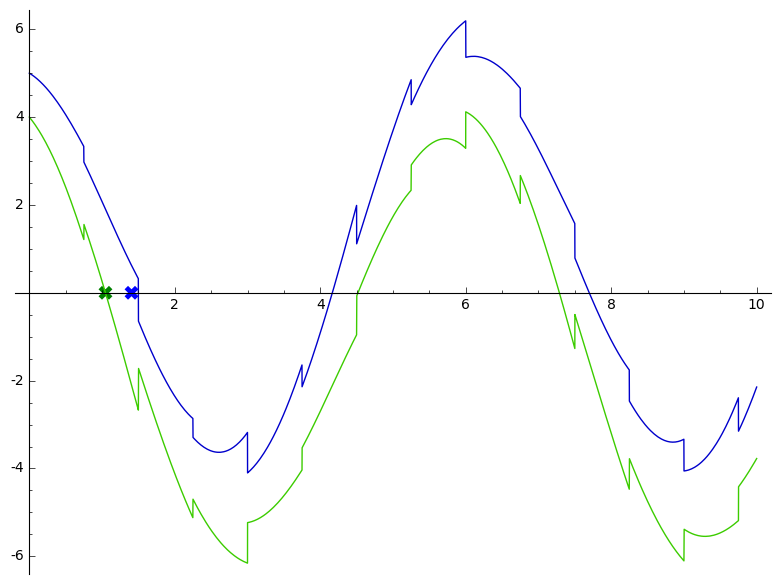

In [101]:
  p1 \
+ point((roots[0].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[0].upper(), 0), size=100, marker='X')

In [102]:
sig = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig = sig.union(to_signal((lambda t: f('x', t)),
                              (lambda t: -f('y', t)),
                              RIF(step*i, step*(i+1))))
sig

t = [0.00000000000000000 .. 0.75000000000000000]
b = -1.?e1
t = [0.69565205420970588 .. 0.75000000000000000]
b = -1.?e1
stopping since presumed converged
t = [0.69565205420970588 .. 0.75000000000000000], fprime(t) = [-5.2780846787713989 .. -2.9519383474795106]
t = [0.75000000000000000 .. 1.5000000000000000]
b = -1.?e1
t = [0.92055337088623645 .. 1.5000000000000000]
b = -1.?e1
t = [1.0211541865916773 .. 1.5000000000000000]
b = -1.?e1
t = [1.0426261155874292 .. 1.5000000000000000]
b = -1.?e1
t = [1.0463927067834084 .. 1.5000000000000000]
b = -1.?e1
t = [1.0470240851773275 .. 1.5000000000000000]
b = -1.?e1
t = [1.0471290646595134 .. 1.5000000000000000]
b = -1.?e1
t = [1.0471464958104030 .. 1.5000000000000000]
b = -1.?e1
found lower bound!
0 on upper boundary!
  I  = [0.75000000000000000 .. 1.0471493894806141]
f(I) = [-0.015530607801751001 .. 2.9768070823578757]
0 on lower boundary!
0 on upper boundary!
t = [2.2500000000000000 .. 3.0000000000000000]
b = 0.?e1
stopping since presumed conver

Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0471493894806141], True), ([2.2500000000000000 .. 4.1662557181795146], False), ([4.5186047217334950 .. 7.2874626322614518], True), ([7.6980849541590412 .. 9.7500000000000000], False)])

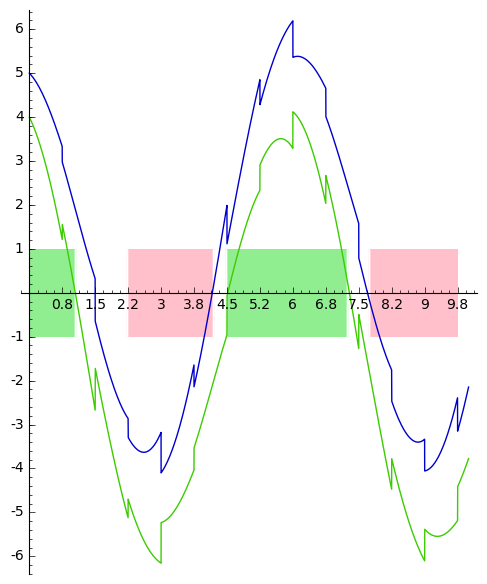

In [104]:
(sig.plot() + p1).show(ticks=[0.75, 1])

In [105]:
sig1 = Signal(RIF(0), [])
step = 0.7
for i in range(10/step):
    sig1 = sig1.union(to_signal_bisection((lambda t: f('x', t)),
                                          RIF(step*i, step*(i+1))))
sig1

Signal([0.00000000000000000 .. 9.7999999999999990], [([0.00000000000000000 .. 0.96249999999999992], True), ([1.3999999999999999 .. 4.1124999999999990], False), ([4.5499999999999989 .. 7.2624999999999993], True), ([7.7874999999999996 .. 9.7999999999999990], False)])

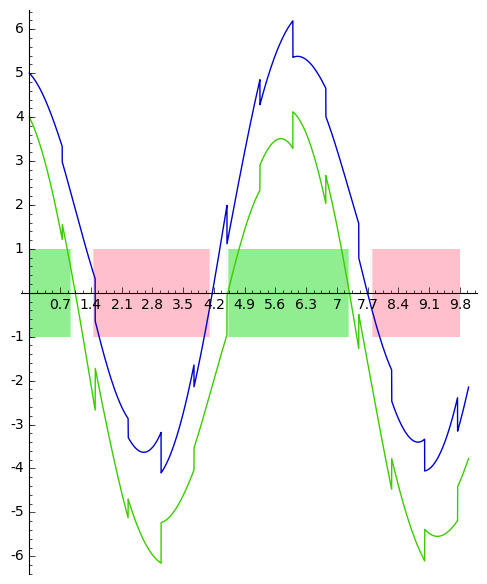

In [106]:
(sig1.plot() + p1).show(ticks=[0.7, 1])

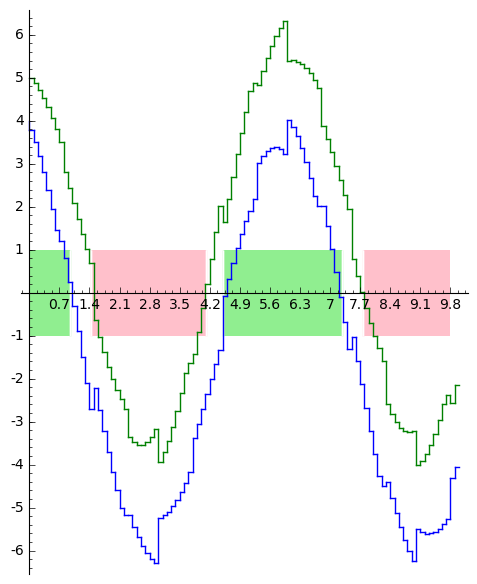

In [107]:
(D.sage_plot('x') + sig1.plot()).show(ticks=[0.7, 1])